In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics  import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [8]:
# chargemnet des datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names


In [9]:
# split train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [10]:
# modèele Décision Tree
clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
    min_samples_leaf=2,
    random_state=42
)






In [11]:
# entrainemen t
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=42)

In [13]:
# evalution
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=class_names))


Accuracy: 0.97
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [14]:
# importance de variable sommme = 1.0
importances = clf.feature_importances_
for name, impo in zip(feature_names, importances):
    print(f"{name}: {impo:.2f}")

sepal length (cm): 0.00
sepal width (cm): 0.00
petal length (cm): 0.58
petal width (cm): 0.42


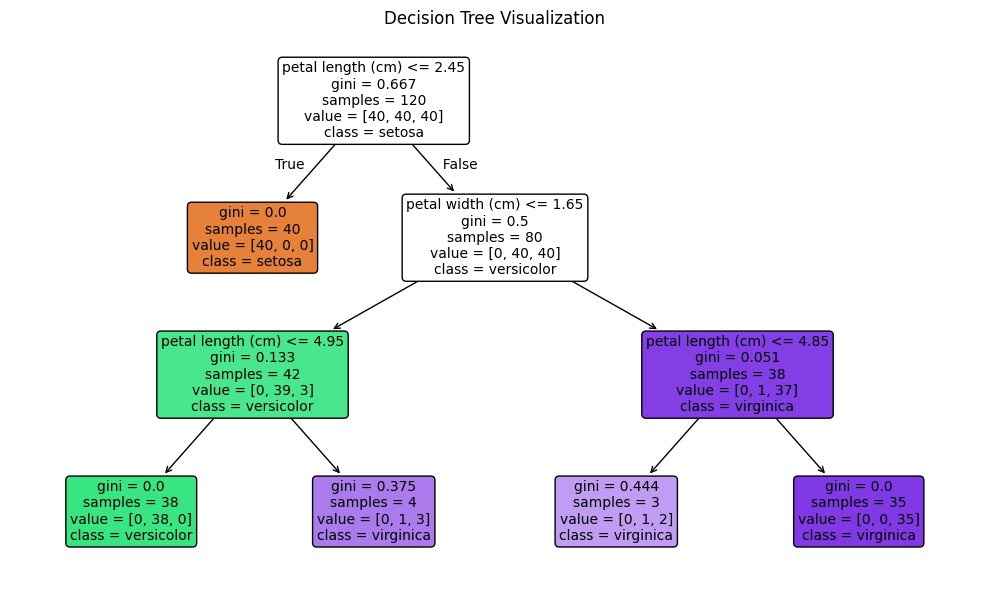

In [15]:
# visualistaion
plt.figure(figsize=(10, 6))
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Decision Tree Visualization")
plt.tight_layout()
plt.show()

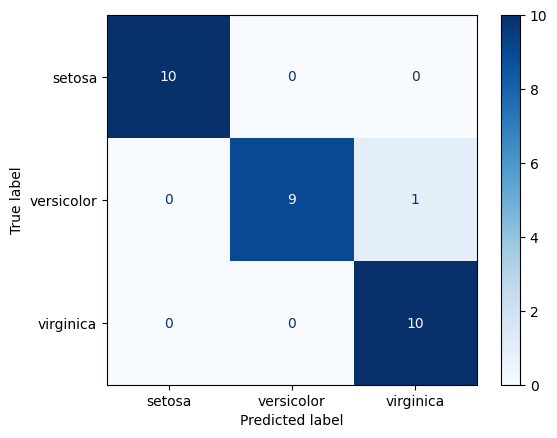

In [16]:
# matrice de confusion
dis = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, display_labels=class_names, cmap="Blues"
)

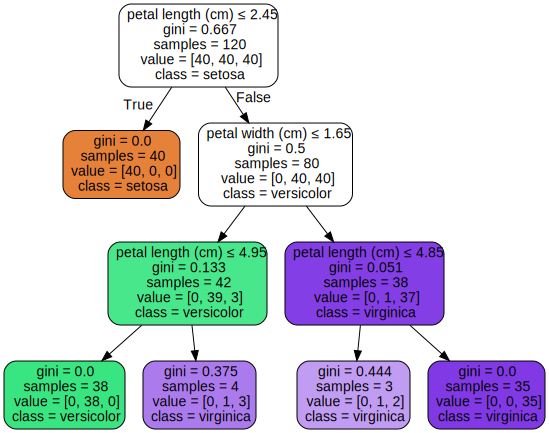

In [18]:
# visualisation avancé de l'arbe


from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    special_characters=True

)

graph = graphviz.Source(dot_data)
graph

In [19]:
# export text
from sklearn.tree import export_text
rules = export_text(clf, feature_names=feature_names)
print(rules)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.65
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.65
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2

